In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Ancho y alto de la pantalla usada:

In [65]:
WIDTH_SCREEN = 1920
HEIGTH_sCREEN = 1080

In [8]:
df = pd.read_csv('gaze_data.csv')

In [9]:
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,NaN,NaN,NaN,NaN,NaN,NaN,7428672430,22826423123,Evento 0
1,NaN,NaN,NaN,NaN,NaN,NaN,7428689085,22826439830,Evento 0
2,NaN,NaN,NaN,NaN,NaN,NaN,7428719331,22826470126,Evento 0
3,NaN,NaN,NaN,NaN,NaN,NaN,7428735986,22826486787,Evento 0
4,NaN,NaN,NaN,NaN,NaN,NaN,7428770028,22826520841,Evento 0


In [10]:
df.describe()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system
count,293.000000,293.000000,295.000000,295.000000,293.000000,295.000000,3.020000e+02,3.020000e+02
mean,0.534689,0.543635,0.531496,0.557239,4.068573,3.995244,7.431210e+09,2.282896e+10
std,0.156740,0.127233,0.159589,0.142253,0.092398,0.095346,1.454908e+06,1.454882e+06
min,0.229392,0.298398,0.220854,0.305039,3.840240,3.787888,7.428672e+09,2.282642e+10
25%,0.333120,0.463255,0.337221,0.497048,4.018738,3.923660,7.429957e+09,2.282771e+10
50%,0.618228,0.583743,0.617815,0.609665,4.095200,4.010971,7.431210e+09,2.282896e+10
75%,0.633534,0.618556,0.635857,0.644849,4.148941,4.075836,7.432463e+09,2.283021e+10
max,0.675874,0.821677,0.681351,0.841574,4.191025,4.134933,7.433716e+09,2.283147e+10


**df.describe()**: statistical summary of the DataFrame: count, meanm standard deviation, minimum and maximum values for each column. 

### **LIMPIEZA DE DATOS**

 **·  Filas con valores NaN:** eliminamos la fila

In [11]:
not_Nan_df = df.dropna()

In [12]:
not_Nan_df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
5,0.353200,0.770397,0.356393,0.774800,3.840240,3.819443,7428786683,22826537497,Evento 0
6,0.345821,0.763192,0.344872,0.778381,3.862534,3.833282,7428803338,22826554152,Evento 0
7,0.333120,0.745722,0.334638,0.764982,3.966980,3.916794,7428819992,22826570807,Evento 0
8,0.328719,0.730688,0.331666,0.745701,4.071503,4.042648,7428836647,22826587468,Evento 0
9,0.325387,0.731423,0.330092,0.742177,4.098541,4.070450,7428853302,22826604129,Evento 0


### EXTRACCIÓN DATOS PARA INPUT DEL GENERADOR DE MAPAS DE CALOR

Me genero un archivo solo con x e y de un ojo para probar el heat map generator

Como los valores de Left Eye X y Left Eye Y vienen en proporción a la anchura y altura de la pantalla, es decir, 0.5 significa que se mira a la mitad de la pantalla, multiplico los datos de ambos para que queden en números enteros, que es lo que admite el programa de generar mapas de calor.

In [67]:
df_heatmap = not_Nan_df[['Left Eye X', 'Left Eye Y']].copy()

df_heatmap['Left Eye X'] = (df_heatmap['Left Eye X'] * WIDTH_SCREEN).astype(int)
df_heatmap['Left Eye Y'] = (df_heatmap['Left Eye Y'] * HEIGTH_sCREEN).astype(int)

df_heatmap['Left Eye X'] = df_heatmap['Left Eye X'].round(0)
df_heatmap['Left Eye Y'] = df_heatmap['Left Eye Y'].round(0)

df_heatmap.to_csv('heatmap_data.csv', index=False, header=False)

<Axes: >

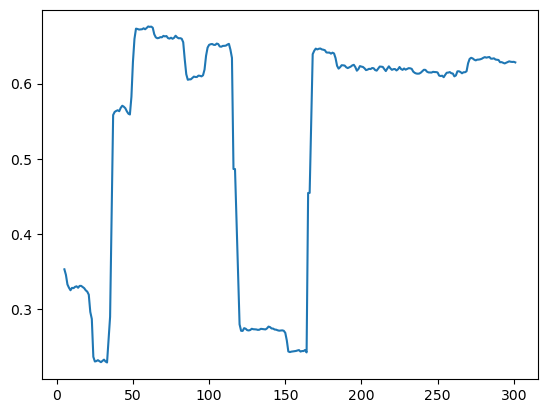

In [68]:
not_Nan_df['Left Eye X'].plot()

**· Filas con valores Nan:** Sustituir por la media de la columna

In [15]:
mean_left_eye_x = df["Left Eye X"].mean()
df["Left Eye X"].fillna(mean_left_eye_x, inplace = True)
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,0.534689,NaN,NaN,NaN,NaN,NaN,7428672430,22826423123,Evento 0
1,0.534689,NaN,NaN,NaN,NaN,NaN,7428689085,22826439830,Evento 0
2,0.534689,NaN,NaN,NaN,NaN,NaN,7428719331,22826470126,Evento 0
3,0.534689,NaN,NaN,NaN,NaN,NaN,7428735986,22826486787,Evento 0
4,0.534689,NaN,NaN,NaN,NaN,NaN,7428770028,22826520841,Evento 0


## GRÁFICAS

#### Gráficas sacadas a partir de la colección de datos originales (sin quitar Nan o sustituir por nada)

Posición X ojo izquierdo

<Axes: >

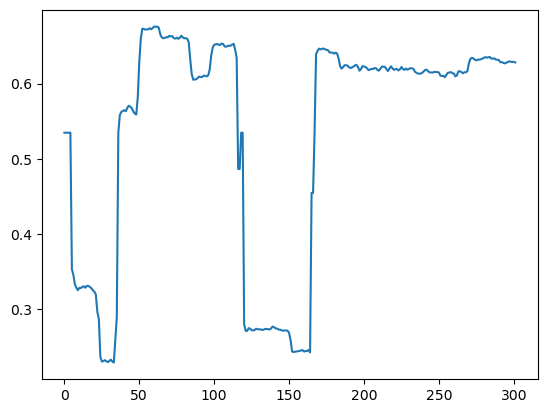

In [16]:
df['Left Eye X'].plot()

Posición Y ojo izquierdo

<Axes: >

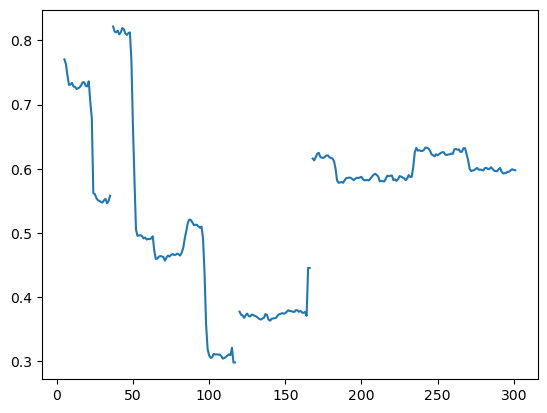

In [17]:
df['Left Eye Y'].plot()

Posición X ojo derecho

<Axes: >

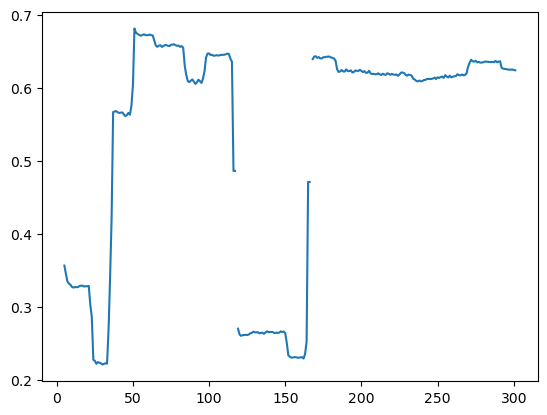

In [18]:
df['Right Eye X'].plot()

Posición Y ojo derecho

Si probamos a hacer el plot sin especificar decimal como comas, vemos que nos da error al no reconocer los datos como numéricos.

<Axes: >

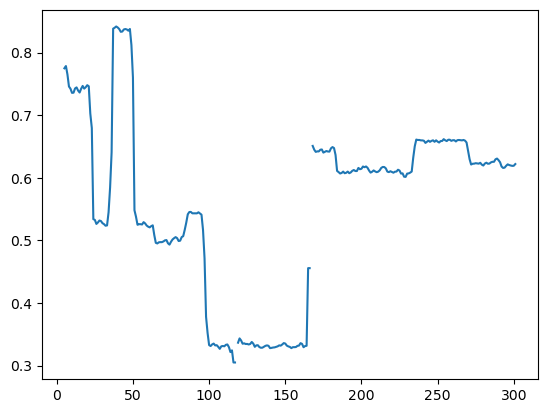

In [19]:
df['Right Eye Y'].plot()

Comparación posición X de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye X', ylabel='Right Eye X'>

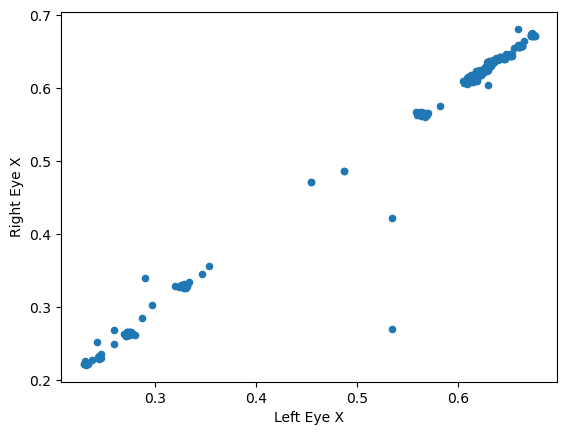

In [20]:
df.plot.scatter(x='Left Eye X', y='Right Eye X')

Comparación posición Y de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye Y', ylabel='Right Eye Y'>

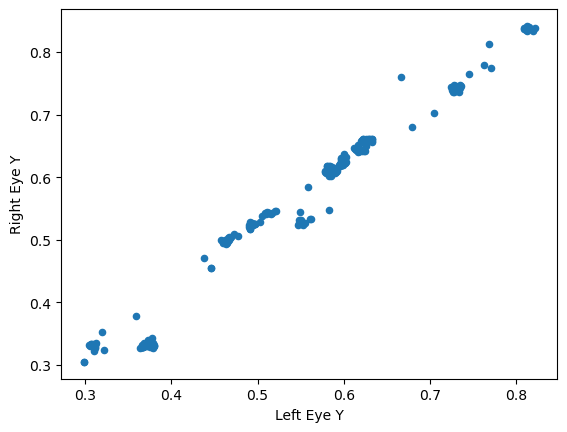

In [21]:
df.plot.scatter(x='Left Eye Y', y='Right Eye Y')

Comparación tamaño pupilas ojo derecho y ojo izquierdo

<Axes: xlabel='Pupil right eye', ylabel='Pupil left eye'>

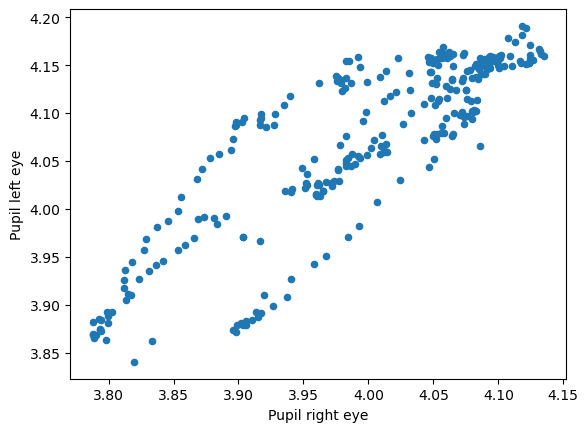

In [22]:
df.plot.scatter(x='Pupil right eye', y='Pupil left eye')

Tamaño de la pupila izquierda

<Axes: >

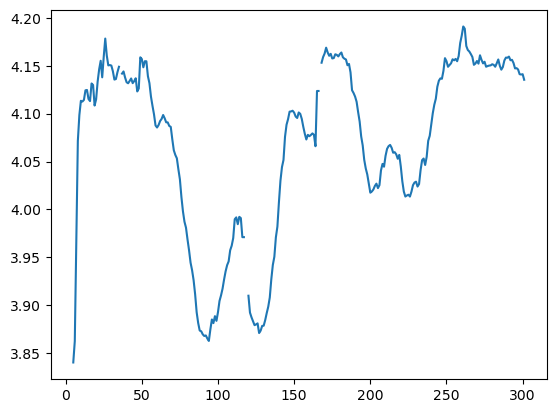

In [23]:
df['Pupil left eye'].plot()

Tamaño de la pupila derecha

<Axes: >

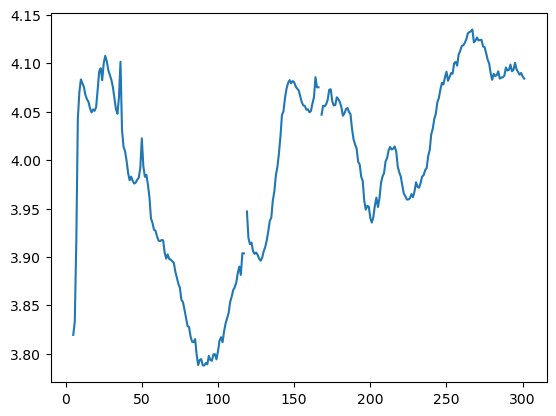

In [24]:
df['Pupil right eye'].plot()

### Gráficas sacadas por Eventos

Gráfica de la posicion X del ojo izquierdo pero solo para el Evento 0

<Axes: >

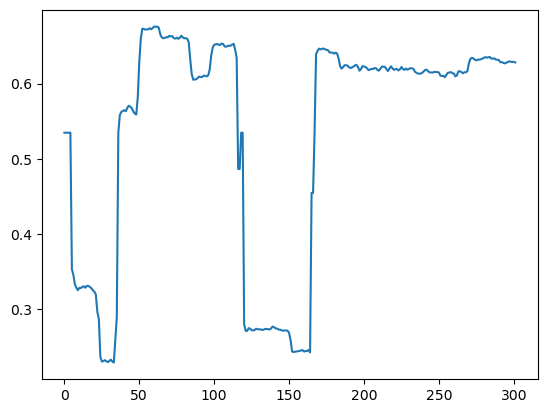

In [25]:
event_0 = df['Event'] == 'Evento 0'
left_eye_x_event_0 = df[event_0]['Left Eye X']
left_eye_x_event_0.plot()

<Axes: >

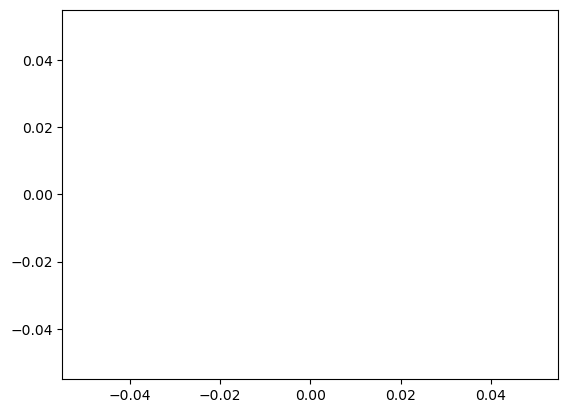

In [26]:
event_1 = df['Event'] == 'Evento 1'
left_eye_x_event_1 = df[event_1]['Left Eye X']
left_eye_x_event_1.plot()

### Comparativas de gráficas realizadas de formas diferentes

Eliminar valores Nan **vs** Rellenar huecos de esos valores para obtener gráfica continua

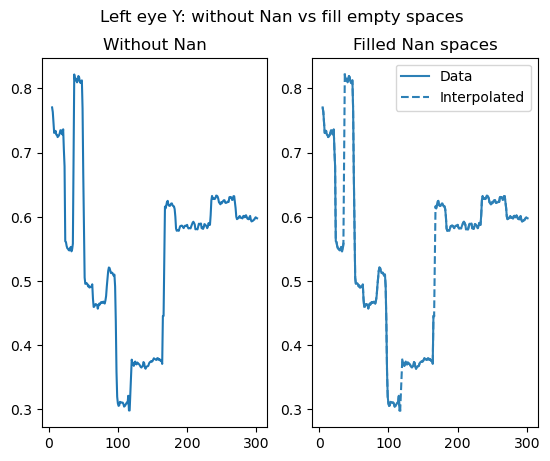

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Left eye Y: without Nan vs fill empty spaces')

ax1.plot(not_Nan_df['Left Eye Y'])
ax1.set_title('Without Nan')

filled_Nan_df = df['Left Eye Y'].interpolate()
ax2.plot(df.index, df['Left Eye Y'], label='Data', color='#2d80b6')
ax2.plot(df.index, filled_Nan_df, label='Interpolated', linestyle='--', color='#2d80b6')
ax2.set_title('Filled Nan spaces')

ax2.legend()

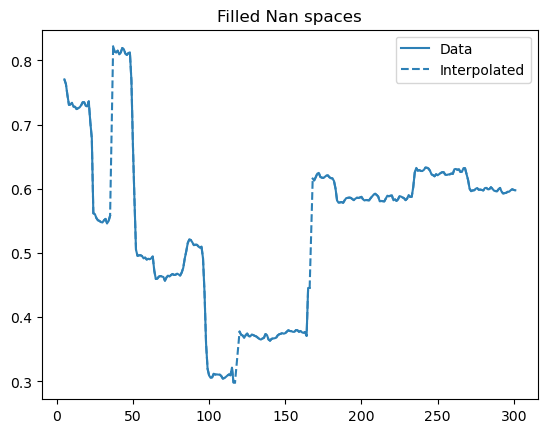

In [63]:

fig, ax = plt.subplots()


filled_Nan_df = df['Left Eye Y'].interpolate()
ax.plot(df.index, df['Left Eye Y'], label='Data', color='#2d80b6')
ax.plot(df.index, filled_Nan_df, label='Interpolated', linestyle='--', color='#2d80b6')
ax.set_title('Filled Nan spaces')
ax.legend()